In [3]:
'''
1. Import Libraries for Data Engineering
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

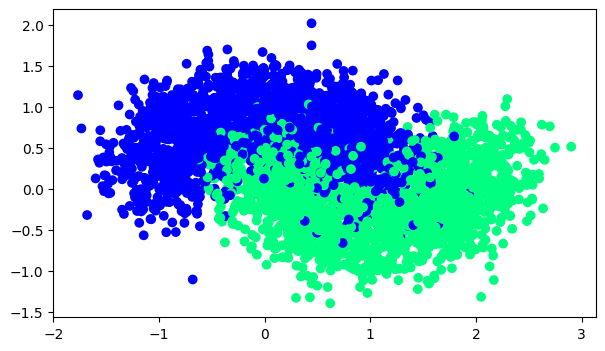

In [4]:
'''
2. Generate make_moon data
'''
N = 4000
x, t = datasets.make_moons(N, noise=0.3)

plt.figure(figsize=(7,4))
plt.scatter(x[:,0], x[:,1], c=t, cmap=plt.cm.winter)

t = t.reshape(N, 1)

In [5]:
'''
3. Split data
'''
X_train, X_test, Y_train, Y_test = \
    train_test_split(x, t, test_size=0.2)

In [7]:
'''
4. Import Libraries for Model Engineering
'''

from sklearn.utils import shuffle
import numpy as np
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.optim as optimizers


np.random.seed(123)
torch.manual_seed(123)

In [44]:
# device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cpu')
device

device(type='cpu')

In [45]:
input_size = 2  # input layer dimensionality
hidden_size = 10
output_dim = 1  # output layer dimensionality
EPOCHS = 100
batch_size = 100
learning_rate = 0.1

In [46]:
class Feed_Forward_Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.a1 = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_size, output_dim)
        self.a2 = nn.Sigmoid()
        
        self.layers = [self.l1, self.a1, self.l2, self.a2]
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [47]:
model = Feed_Forward_Net(input_size=input_size, hidden_size=hidden_size, output_dim=output_dim).to(device)

In [48]:
optimizer = optimizers.SGD(model.parameters(), lr=learning_rate)

In [49]:
criterion = nn.BCELoss()

In [50]:
def compute_loss(t, y):
    return criterion(y, t)

In [51]:
def train_step(x, t):
    model.train()
    preds = model(x)
    loss = compute_loss(t, preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss

In [52]:
def test_step(x, t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    
    model.eval()
    preds = model(x)
    loss = compute_loss(t, preds)
    
    return loss, preds

In [53]:
n_batches = X_train.shape[0] // batch_size

for epoch in range(EPOCHS):
    train_loss = 0.
    x_, t_ = shuffle(X_train, Y_train)
    x_ = torch.Tensor(x_).to(device)
    t_ = torch.Tensor(t_).to(device)
    
    for batch in range(n_batches):
        start = batch * batch_size
        end = start + batch_size
        loss = train_step(x_[start:end], t_[start:end])
        train_loss += loss.item() / n_batches
        
    print("Epoch : {}, Loss : {:.3f}".format(epoch+1, train_loss))

Epoch : 1, Loss : 0.700
Epoch : 2, Loss : 0.665
Epoch : 3, Loss : 0.638
Epoch : 4, Loss : 0.609
Epoch : 5, Loss : 0.579
Epoch : 6, Loss : 0.547
Epoch : 7, Loss : 0.517
Epoch : 8, Loss : 0.491
Epoch : 9, Loss : 0.467
Epoch : 10, Loss : 0.448
Epoch : 11, Loss : 0.432
Epoch : 12, Loss : 0.419
Epoch : 13, Loss : 0.408
Epoch : 14, Loss : 0.399
Epoch : 15, Loss : 0.391
Epoch : 16, Loss : 0.384
Epoch : 17, Loss : 0.378
Epoch : 18, Loss : 0.372
Epoch : 19, Loss : 0.368
Epoch : 20, Loss : 0.364
Epoch : 21, Loss : 0.360
Epoch : 22, Loss : 0.357
Epoch : 23, Loss : 0.354
Epoch : 24, Loss : 0.351
Epoch : 25, Loss : 0.349
Epoch : 26, Loss : 0.347
Epoch : 27, Loss : 0.345
Epoch : 28, Loss : 0.344
Epoch : 29, Loss : 0.343
Epoch : 30, Loss : 0.342
Epoch : 31, Loss : 0.340
Epoch : 32, Loss : 0.339
Epoch : 33, Loss : 0.339
Epoch : 34, Loss : 0.338
Epoch : 35, Loss : 0.338
Epoch : 36, Loss : 0.337
Epoch : 37, Loss : 0.337
Epoch : 38, Loss : 0.336
Epoch : 39, Loss : 0.336
Epoch : 40, Loss : 0.336
Epoch : 4

In [54]:
loss, preds = test_step(X_test, Y_test)
test_loss = loss.item()
preds = preds.data.cpu().numpy() > 0.5
test_acc = accuracy_score(Y_test, preds)

print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss, test_acc))

test_loss: 0.322, test_acc: 0.861
